# Coursera Course Analysis

## Introduction

In this project a dataset from the Kaggle (https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset) will be used. The data was scrapped from Coursera official web site by Kaggle user named SIDDHARTH M. Based on the author, this dataset contains 6 features and 890 course data.

To get a better feel of data and find useful patterns, the queries and filtering data using Pandas, visualizing data with Matplotlib & Seaborn will be performed.

The scope of this project includes:
1. Loading data using Pandas.
2. Performing data cleaning.
3. Exploratory data analysis.
4. Conclusions based on the insights after the analysis.

## 1. Data loading using Pandas

In [1]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords


%matplotlib inline

The dataset is loaded by using Pandas, the existing index column is used as index column in a created DataFrame.

In [2]:
df = pd.read_csv('./coursea_data.csv', sep=',', index_col=0)

In [3]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## 2. Data cleaning

Before starting the analysis of dataset, data cleaning is performed.</n>

**The following data cleaning steps are performed**:</n>
* Handling missing values.</n>
* Removing duplicates.</n>
* Data type review and conversion as needed. </n>
* Treating the outliers.</n>

### Handling missing values and removing duplicates
First, the DataFrame is checked whether the dataset has missing values in any column (feature). Duplicate samples, if any, are also are removed.

In [4]:
missing_values_count = df.isnull().sum()
print(f'The number of missing data points per column:\n\n{missing_values_count}')

The number of missing data points per column:

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


In [5]:
print(f'The number of samples in the original dataset is {df.shape[0]}.') 
df = df.drop_duplicates()
print(f'The number of samples after removing duplicate rows is {df.shape[0]}.') 

The number of samples in the original dataset is 891.
The number of samples after removing duplicate rows is 891.


### Data review and conversion as needed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


From the DataFrame information above, it can be seen that data about the number of students enrolled is stored as **object** dtype, although, it has numerical values together with metric SI prefix. 
In the next step it will be determined how many unique prefixes there are, and accordingly strings will be converted to numeric data.

In [7]:
unique_prefixes = df['course_students_enrolled'].apply(lambda x: x[-1]).unique()
unique_prefixes

array(['k', 'm'], dtype=object)

Since the lowercase m sybol should be considered as mili prefix in metric system, according to the context of the data, it would be more correct to assume that it stands for mega (as capital letter M).

In [8]:
df['course_students_enrolled'] = (df['course_students_enrolled'].replace(r'[km]+$', '', regex=True).astype(float) * df['course_students_enrolled'].str.extract(r'[\d\.]+([km]+)', expand=False).replace(['k', 'm'], [10**3, 10**6])).astype('float')
df['course_students_enrolled']

134      5300.0
743     17000.0
874    130000.0
413     91000.0
635    320000.0
         ...   
236     52000.0
883     21000.0
545     30000.0
875      9800.0
163     38000.0
Name: course_students_enrolled, Length: 891, dtype: float64

In [9]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


### Treating the outliers

In [10]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


To observe the distribution, a visual representation is also used. Since the rating value and the number of students that are enrolled in the course value scales differently, their visualizations are presented seperately.

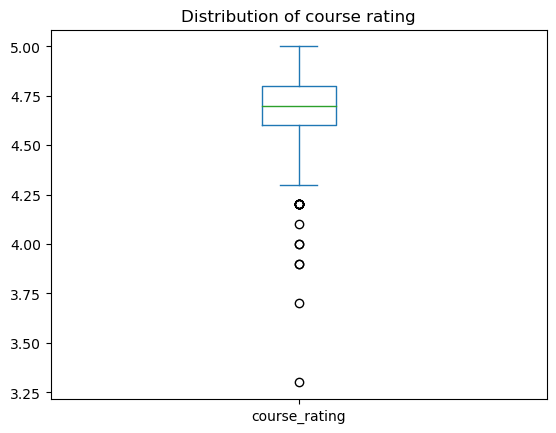

In [11]:
boxplot = df['course_rating'].plot.box(title='Distribution of course rating')
plt.show()

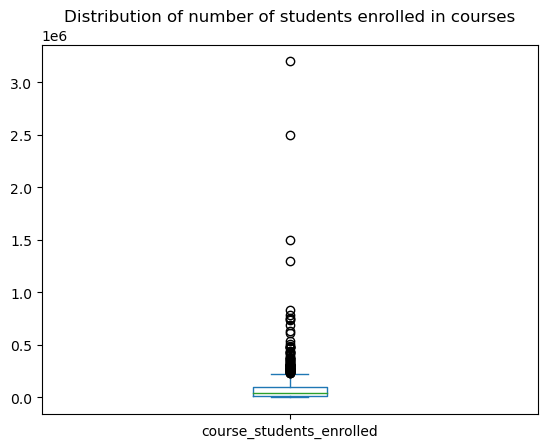

In [12]:
boxplot = df['course_students_enrolled'].plot.box(title='Distribution of number of students enrolled in courses')
plt.show()

According to the description of the data in the DataFrame, it can be seen that the course rating values are within the logical range, which is officialy used for Coursera course rating system (up to five stars). Also, it is noticeable wide range of distribution for the number of students who has enrolled the course, but considering the assumptions made while converting to numerical values, none of these values are considered as outliers.

## 3. Exploratory data analysis

### About the dataset

In [13]:
print(f'This dataset contains {df.shape[1]} columns (features) and {df.shape[0]} course data (samples).') 

This dataset contains 6 columns (features) and 891 course data (samples).


In [14]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numeric_features = df.drop(categorical_features, axis=1).columns.tolist()
print(f"Features of this dataset are evaluated according to their data type. It consist of {len(categorical_features)} categorical features ({', '.join(categorical_features)}) and {len(numeric_features)} numeric features ({', '.join(numeric_features)}).")

Features of this dataset are evaluated according to their data type. It consist of 4 categorical features (course_title, course_organization, course_Certificate_type, course_difficulty) and 2 numeric features (course_rating, course_students_enrolled).


#### Course titles

In [15]:
unique_title = df['course_title'].nunique()
pop_title = df.groupby(['course_title'])['course_title'].count().pipe(lambda  dfx: dfx.loc[dfx>1])
print(f'From the {df.shape[0]} course data (samples) there are {unique_title} samples with unique title and {len(pop_title)} samples with titles, which are repeated at least once.') 

From the 891 course data (samples) there are 888 samples with unique title and 3 samples with titles, which are repeated at least once.


In [16]:
df_course_count = df[df.groupby(['course_title'])['course_title'].transform('count') > 1]
df_course_count_str = df_course_count.to_string(index=False, justify='center')
print(f'Courses in which titles are repeated:\n\n{df_course_count_str}')

Courses in which titles are repeated:

        course_title            course_organization    course_Certificate_type  course_rating course_difficulty  course_students_enrolled
Developing Your Musicianship  Berklee College of Music              COURSE          4.8                 Mixed             41000.0        
Developing Your Musicianship  Berklee College of Music      SPECIALIZATION          4.8              Beginner             54000.0        
            Machine Learning  University of Washington      SPECIALIZATION          4.6          Intermediate            290000.0        
            Machine Learning       Stanford University              COURSE          4.9                 Mixed           3200000.0        
           Marketing Digital Universidade de São Paulo              COURSE          4.8              Beginner             81000.0        
           Marketing Digital       Universidad Austral      SPECIALIZATION          4.7              Beginner             39000.0    

In [17]:
stop_words = set(stopwords.words('english'))
all_titles = ' '.join(df['course_title'])
words = all_titles.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
title_word_counts = Counter(filtered_words)
most_common_words = title_word_counts.most_common(10)
top_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Count']).reset_index(drop=True)
top_common_words.index +=1
top_common_words

,Word,Count
1,Introduction,75
2,Data,69
3,Management,46
4,Science,36
5,Business,36
6,Python,34
7,Learning,32
8,Health,31
9,Google,29
10,Fundamentals,28


In [18]:
print(f'The most common word in course titles is "{top_common_words.loc[1]["Word"]}".')

The most common word in course titles is "Introduction".


#### Course organization

In [19]:
unique_org = df['course_organization'].nunique()
print(f'The dataset contains courses from {unique_org} different course organizations.')

The dataset contains courses from 154 different course organizations.


In [20]:
pop_org = df.groupby(['course_organization'])['course_organization'].count().pipe(lambda  dfx: dfx.loc[dfx>1])
print(f'However, only {len(pop_org.index)} of them conduct more than 1 course.')

However, only 105 of them conduct more than 1 course.


In [21]:
top_pop_org=pd.DataFrame(pop_org).rename({"course_organization": "number_of_courses"}, axis=1).sort_values(by=['number_of_courses'], ascending=False)
print(f'Top 10 of the course organizations by number of courses in the dataset are:\n\n {top_pop_org.head(10)}')

Top 10 of the course organizations by number of courses in the dataset are:

                                             number_of_courses
course_organization                                          
University of Pennsylvania                                 59
University of Michigan                                     41
Google Cloud                                               34
Duke University                                            28
Johns Hopkins University                                   28
University of California, Irvine                           27
University of Illinois at Urbana-Champaign                 22
IBM                                                        22
University of California, Davis                            21
University of Colorado Boulder                             19


#### Course certificate type

In [22]:
certificate_type_counts = df['course_Certificate_type'].value_counts()
print(f'In the dataset there are {certificate_type_counts.nunique()} different types of available certificition:\n\n{certificate_type_counts}.')

In the dataset there are 3 different types of available certificition:

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64.


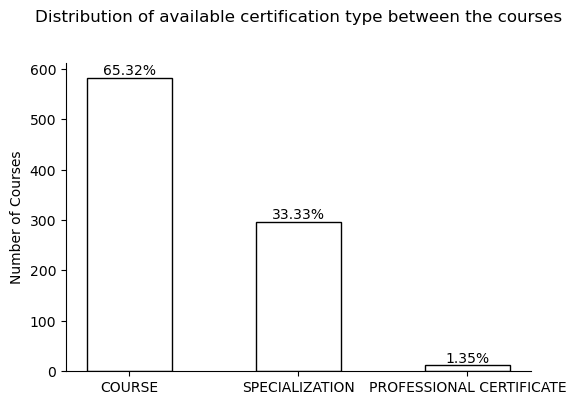

In [23]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.bar(certificate_type_counts.index, certificate_type_counts.values, width=0.5, edgecolor='black', color='none')
plt.ylabel('Number of Courses')
plt.title('Distribution of available certification type between the courses', pad=30)
for i, v in enumerate(certificate_type_counts):
    ax.text(i, v, str(f'{(100*v/certificate_type_counts.values.sum()).round(2)}%'), ha='center', va='bottom')
plt.show()

#### Course rating

Coursera official web site has a 5-star course rating system. Therefore, each dataset sample has the rating associated with each course.

In [24]:
print(f'The lowest average course rating is {df["course_rating"].min()}, the highest is {df["course_rating"].max()}.')

The lowest average course rating is 3.3, the highest is 5.0.


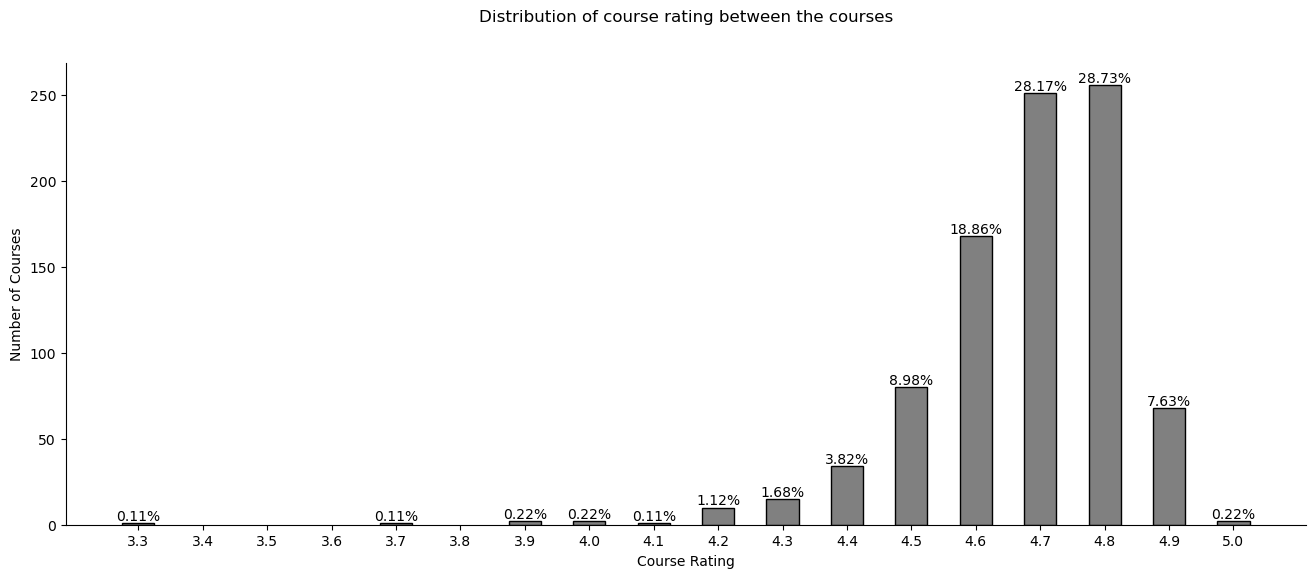

In [25]:
df['course_rating'] = df['course_rating'].round(1)
course_rating_counts = df.groupby('course_rating')['course_students_enrolled'].count()
fig = plt.figure(figsize=(16, 6))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.bar(course_rating_counts.index, course_rating_counts.values, width=0.05, edgecolor='black', color='grey')
x_ticks = np.arange(df["course_rating"].min(), df["course_rating"].max() + 0.1, .1).round(1)
df_re = pd.DataFrame(index=x_ticks)
df_re['course_rating_counts'] = course_rating_counts
df_re = df_re.fillna(0) 
plt.xticks(x_ticks)
plt.xlabel('Course Rating')
plt.ylabel('Number of Courses')
plt.title('Distribution of course rating between the courses', pad=30)
for i, v in enumerate(df_re['course_rating_counts']):
    ax.text(x_ticks[i], v, str(f'{(100*v/df_re["course_rating_counts"].values.sum()).round(2)}%'), ha='center', va='bottom') if v != 0 else None
plt.show()

#### Course difficulty

In [26]:
course_diffuculty_counts = df['course_difficulty'].value_counts()
print(f'The dataset contains courses of {course_diffuculty_counts.nunique()} different difficulty levels:\n\n{course_diffuculty_counts}.')

The dataset contains courses of 4 different difficulty levels:

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64.


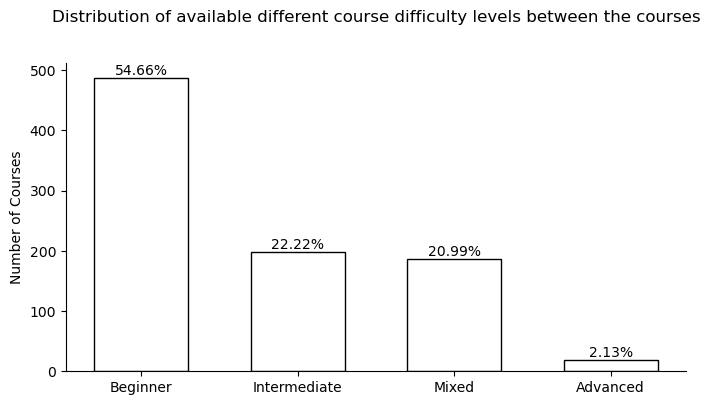

In [27]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.bar(course_diffuculty_counts.index, course_diffuculty_counts.values, width=0.6, edgecolor='black', color='none')
plt.ylabel('Number of Courses')
plt.title('Distribution of available different course difficulty levels between the courses', pad=30)
for i, v in enumerate(course_diffuculty_counts):
    ax.text(i, v, str(f'{(100*v/course_diffuculty_counts.values.sum()).round(2)}%'), ha='center', va='bottom')
plt.show()

#### Course students enrolled

In [28]:
print(f'The smallest number of students enrolled to the course is {df["course_students_enrolled"].min():.0f}, the highest is {df["course_students_enrolled"].max():.0f}.')

The smallest number of students enrolled to the course is 1500, the highest is 3200000.


In [29]:
stundents_enrolled_counts = df['course_students_enrolled'].value_counts()
print(f'The most common courses (in total {stundents_enrolled_counts.iloc[0]} courses) in this dataset are with the {stundents_enrolled_counts.index[0]:.0f} students enrolled.')

The most common courses (in total 22 courses) in this dataset are with the 120000 students enrolled.


To observe differences and compare the amount of courses between different number of students enrolled in the course, a visual representation is used.

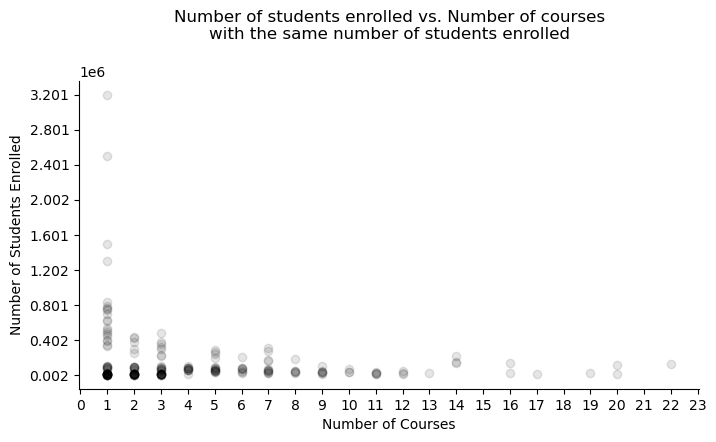

In [30]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.scatter(stundents_enrolled_counts.values, stundents_enrolled_counts.index, color='black', alpha=0.1)
plt.xticks(np.arange(0, 24))
plt.yticks(np.arange(df["course_students_enrolled"].min(), df["course_students_enrolled"].max()+100000, 400000))
plt.xlabel('Number of Courses')
plt.ylabel('Number of Students Enrolled')
plt.title('Number of students enrolled vs. Number of courses\nwith the same number of students enrolled', pad=30)
plt.show()

In the graph, darker areas indicate a higher concentration of courses with similar (but not the identical) number of students enrolled. It can be seen that the dataset consist more of smaller number of students enrolled courses than bigger.

### Most popular and best rated organizations and courses

Information about the courses with the highest course rating are provided below:

In [31]:
course_rating_sorted = df.sort_values(by='course_rating', ascending=False)
course_rating_sorted[course_rating_sorted['course_rating'] >= min(course_rating_sorted['course_rating'].unique()[:1])]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0


Information about the course with the highest number of students enrolled is provided below:

In [32]:
course_rating_sorted = df.sort_values(by='course_students_enrolled', ascending=False)
course_rating_sorted[course_rating_sorted['course_students_enrolled'] >= min(course_rating_sorted['course_students_enrolled'].unique()[:1])]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0


### Course classification according to the sertificate type available and course difficulty

The graph below shows the complexity of the courses by difficulty and the certificate type available.

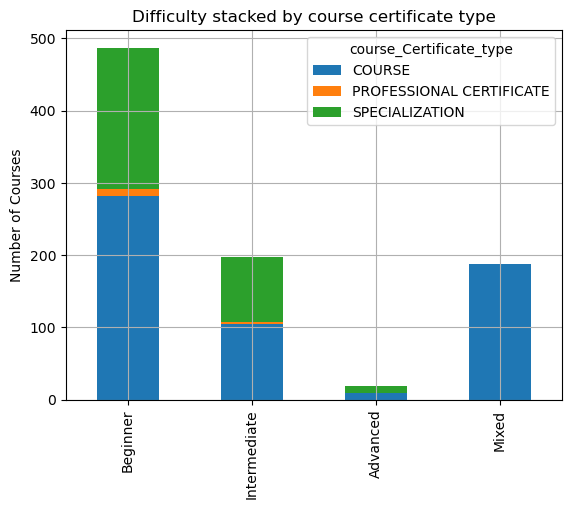

In [33]:
grouped = df.groupby(
    ['course_difficulty', 'course_Certificate_type']
).size().unstack().reindex(['Beginner', 'Intermediate', 'Advanced', 'Mixed'])
grouped.plot(kind='bar', stacked=True)
plt.grid()
plt.title('Difficulty stacked by course certificate type')
plt.xlabel('')
plt.ylabel('Number of Courses')
plt.show()

According to the graph, it can be said that beginner level courses are the most popular in the dataset. It should also be noticed that a large part of the courses consists of course certificate type courses.

### The weight of most common words in course titles

To evaluate whether common words in titles affects the popularity of the course, top 10 most common words in titles from this data set used.
A new dataset feature is created, which shows how many words from the 10 most common words in title are in a specific sample title.

In [34]:
top_words_set = set([word.lower() for word in top_common_words.Word.values.tolist()])
df['top_words_in_title'] = df['course_title'].apply(lambda x: len(set(x.lower().split()).intersection(top_words_set)))
df.sort_values(by='top_words_in_title', ascending=False).head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,top_words_in_title
227,Google Cloud Platform Big Data and Machine Lea...,Google Cloud,COURSE,4.6,Intermediate,120000.0,4
187,Introduction to Data Science in Python,University of Michigan,COURSE,4.5,Intermediate,390000.0,4
147,Investment Management with Python and Machine ...,EDHEC Business School,SPECIALIZATION,4.6,Beginner,14000.0,3
26,Applied Data Science with Python,University of Michigan,SPECIALIZATION,4.5,Intermediate,480000.0,3
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,3


Based on the obtained results, to show effect of top 10 common words in titles two new charts are prepared.

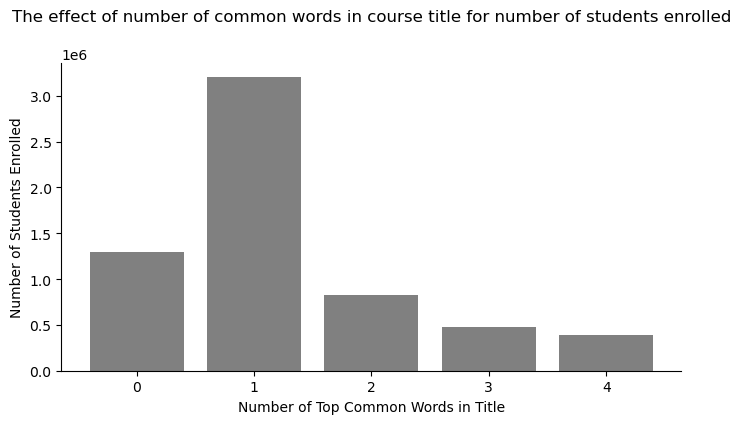

In [35]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Top Common Words in Title')
plt.ylabel('Number of Students Enrolled')
plt.title('The effect of number of common words in course title for number of students enrolled', pad=30)
plt.bar(df['top_words_in_title'], df['course_students_enrolled'], color='grey')
plt.show()

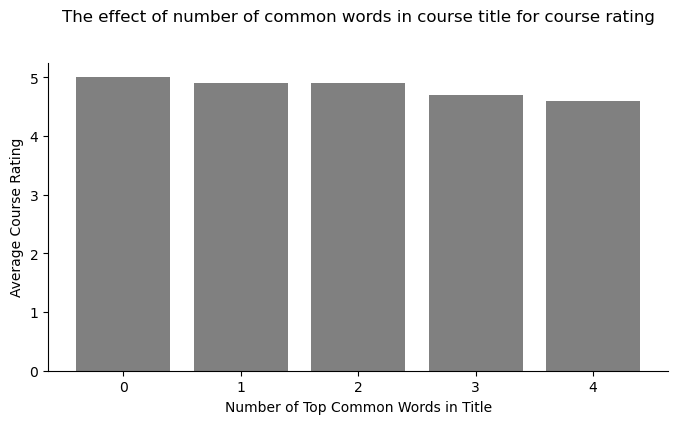

In [36]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Top Common Words in Title')
plt.ylabel('Average Course Rating')
plt.title('The effect of number of common words in course title for course rating', pad=30)
plt.bar(df['top_words_in_title'], df['course_rating'], color='grey')
plt.show()

From the first chart it can be seen that the most students enrolled in the course that has one of top 10 most common words in course title, but it should be noted that the second by number of students enrolled is group of courses, that do not have a top common word in their title at all. Based on the second chart, there is no significant difference between the course with and without top common words in their title.

### The impact of the number of students enrolled on the course rating

To evaluate the effect of number of student enrolled to course rating, a boxplot graph is used.  

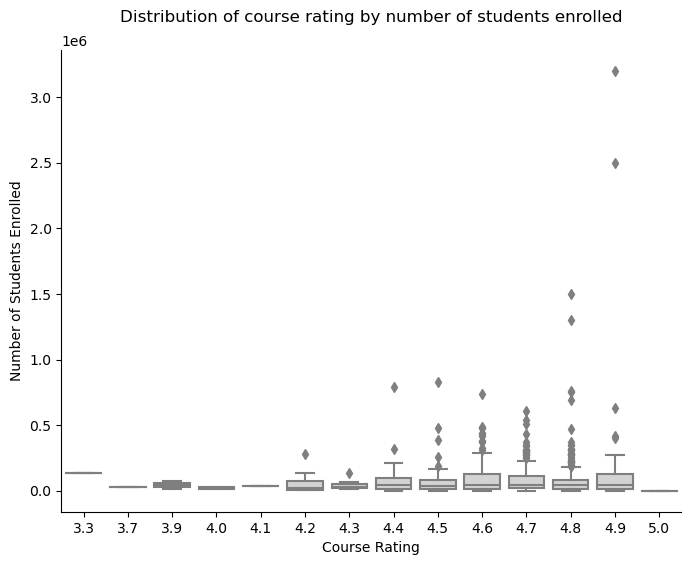

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.spines[['top', 'right']].set_visible(False)
ax = sns.boxplot(data=df, x = 'course_rating', y = 'course_students_enrolled', color='lightgrey' ) 
ax.set_xlabel("Course Rating")
ax.set_ylabel("Number of Students Enrolled")
ax.set_title("Distribution of course rating by number of students enrolled", pad=20)
plt.show()

Based on the visible distribution, the majority of the rated courses has up to approximately 300 thousand enrolled students. Courses with more enrolled students, according to the boxplot chart, could be considered outliers.

### Evaluation course organizations that prepared the most courses

The barchart will be used to evaluate how often the most common words in titles are used in the most popular (the most courses prepared) organization course titles and whether these organizations course ratings much differ in between.

In [38]:
top_pop_org.head(10)

,number_of_courses
course_organization,
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Duke University,28
Johns Hopkins University,28
"University of California, Irvine",27
University of Illinois at Urbana-Champaign,22
IBM,22
"University of California, Davis",21


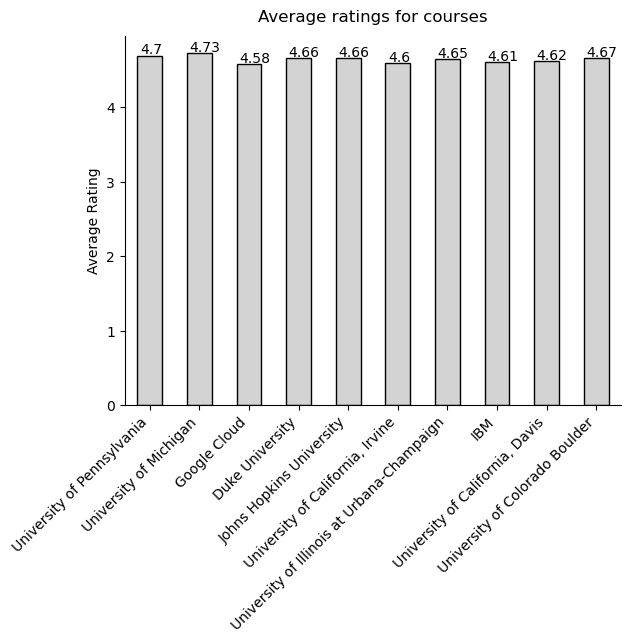

In [39]:
result = {}
for organization in top_pop_org.index[:10]:
    avg_rating = df[df['course_organization'] == organization]['course_rating'].mean()
    result[organization]=avg_rating
top_org_rating = pd.DataFrame(result, index=[0]).transpose().rename({0: 'average rating'}, axis = 1)
ax = top_org_rating.plot(kind='bar', legend=None, grid=False, color='lightgrey', edgecolor='black')
ax.set_xlabel('')
ax.set_ylabel('Average Rating')
ax.set_title('Average ratings for courses', pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, v in enumerate(top_org_rating['average rating']):
    ax.text(i-0.2, v+0.02, str(round(v, 2)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

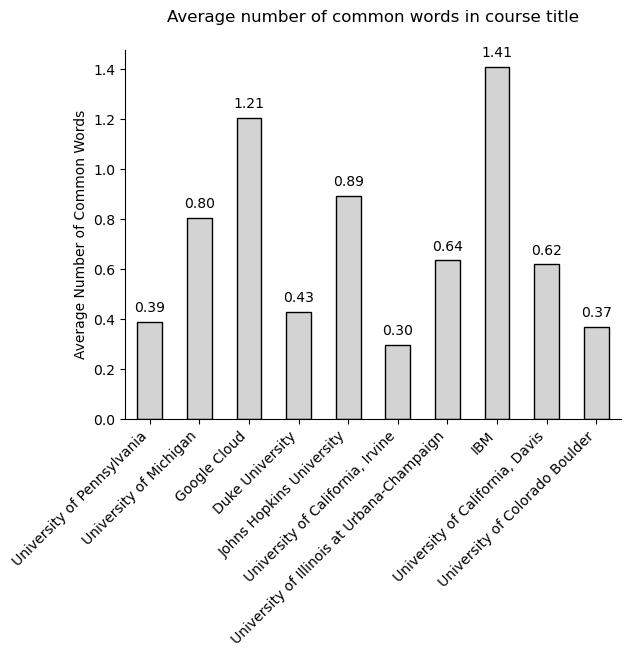

In [40]:
result = {}
for organization in top_pop_org.index[:10]:
    avg_s = df[df['course_organization'] == organization]['top_words_in_title'].mean()
    result[organization]=avg_s
df2 = pd.DataFrame(result, index=[0]).transpose().rename({0: 'average number of common words in title'}, axis = 1)
ax = df2.plot.bar(legend=None, grid=False, color='lightgrey', edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_title('Average number of common words in course title', pad=20)
ax.set_xlabel('')
ax.set_ylabel("Average Number of Common Words")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Based on the first chart, there is no significant differences in course ratings between the most popular (with the highest number of courses in the dataset) course organizations. However, it should be noted that according to the second chart, it can be seen, that the highest average number of top common words in titles has "Google Cloud" and "IBM" course organizations.

## 4. Conclusion

Based on the findings obtained by observing the data itself and the relationships between data, the following insights could be distinguished:
* More than a half (54,66%) of the courses in this dataset is for beginners. Moreover, the most popular word in the course titles is 'Introduction';
* Based on a distribution of course ratings by number of students enrolled, it cannot be assumed that a larger number of students enrolled means a better course rating and vice versa;
* More than a half (55,90%) of the courses in this dataset is rated in between 4,7 and 4,8 out of 5;
* Based on the 10 most popular and common occurring words in the course title, it can be said that it may have an effect on the number of students enrolled, but it certainly does not ensure better course quality (evaluating by the course rating);
* Although the top 10 organizations conducting the most courses do not differ from each other in terms of course rating, however, two organizations ("Google Cloud" and "IBM") stand out, which use popular words more often in their course title. It is worth noting that all the remaining organizations in the above-mentioned top 10 list are universities and perhaps the fact that "Google Cloud" and "IBM" are private and profit-seeking organizations, more attention is paid to marketing nuances to attract more students to enroll into courses.